
___
# Logistic Regression Project 

In this project we will be working with a advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

By using above data set, I have tried to explain the following concept of Logistic Regression:-

* Finding the corelation of features with 'Clicked on Ad'
* Finding the features which are not useful
* Creating bins of the useful features to improve the prediction Accuracy
* Using various scikit learn algorithms and comparing their accuracy
* Predicting the variables of the different algorithm using 'gridsearch' Algorithm

Suggestion :- 

* First try to make prediction without using the bins of useful features and gridsearch
* Compare the difference in the accuracy before and after above step

## Import Libraries

**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [2]:
ad_data = pd.read_csv('advertising.csv')

**Check the head of ad_data**

In [3]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


** Use info and describe() on ad_data**

In [4]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


** describe() **
* describe() method tells us about numeric features
* use 'include = np.object' for object type of features 

In [5]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


* 'Ad Topic Line' , 'City' , 'Country' ,'Timestamp' have so many unique values
* These features are of not much use for us

In [6]:
ad_data.describe(include=np.object)

,Ad Topic Line,City,Country,Timestamp
count,1000,1000,1000,1000
unique,1000,969,237,1000
top,Balanced uniform algorithm,Williamsport,Czech Republic,2016-02-29 23:56:06
freq,1,3,9,1


## Exploratory Data Analysis
 
Create bins of the useful features and check their corelation with 'Clicked on Ad' Feature
* Read difference between cut and qcut
https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.qcut.html

Let's use seaborn to explore the data!

Try recreating the plots shown below!

** Create a histogram of the Age**



In [7]:
ad_data[['Male', 'Clicked on Ad']].groupby(['Male'], as_index=False).mean().sort_values(by='Clicked on Ad', ascending=False)

,Male,Clicked on Ad
0,0,0.518304
1,1,0.480249


In [8]:
ad_data['AgeBand'] = pd.cut(ad_data['Age'], 5)
ad_data[['AgeBand', 'Clicked on Ad']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Clicked on Ad
0,"(18.958, 27.4]",0.214286
1,"(27.4, 35.8]",0.327684
2,"(35.8, 44.2]",0.611684
3,"(44.2, 52.6]",0.887324
4,"(52.6, 61.0]",0.977778


In [10]:
ad_data['DailyTimeBand'] = pd.cut(ad_data['Daily Time Spent on Site'], 5)
ad_data[['DailyTimeBand', 'Clicked on Ad']].groupby(['DailyTimeBand'], as_index=False).mean().sort_values(by='DailyTimeBand', ascending=True)

,DailyTimeBand,Clicked on Ad
0,"(32.541, 44.366]",1.000000
1,"(44.366, 56.132]",0.967320
2,"(56.132, 67.898]",0.691892
3,"(67.898, 79.664]",0.174061
4,"(79.664, 91.43]",0.079812


In [9]:
ad_data['AreaIncomeBand'] = pd.cut(ad_data['Area Income'], 5)
ad_data[['AreaIncomeBand', 'Clicked on Ad']].groupby(['AreaIncomeBand'], as_index=False).mean().sort_values(by='AreaIncomeBand', ascending=True)

,AreaIncomeBand,Clicked on Ad
0,"(13931.012, 27094.16]",1.000000
1,"(27094.16, 40191.82]",0.909091
2,"(40191.82, 53289.48]",0.661479
3,"(53289.48, 66387.14]",0.350785
4,"(66387.14, 79484.8]",0.265403


In [11]:
ad_data['DailyUsageBand'] = pd.cut(ad_data['Daily Internet Usage'], 5)
ad_data[['DailyUsageBand', 'Clicked on Ad']].groupby(['DailyUsageBand'], as_index=False).mean().sort_values(by='DailyUsageBand', ascending=True)

,DailyUsageBand,Clicked on Ad
0,"(104.615, 137.816]",1.000000
1,"(137.816, 170.852]",0.866337
2,"(170.852, 203.888]",0.302564
3,"(203.888, 236.924]",0.059701
4,"(236.924, 269.96]",0.086022


In [12]:
ad_data.drop(['City','Ad Topic Line','Timestamp','Country'],inplace=True,axis=1)

In [13]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,AgeBand,AreaIncomeBand,DailyTimeBand,DailyUsageBand
0,68.95,35,61833.90,256.09,0,0,"(27.4, 35.8]","(53289.48, 66387.14]","(67.898, 79.664]","(236.924, 269.96]"
1,80.23,31,68441.85,193.77,1,0,"(27.4, 35.8]","(66387.14, 79484.8]","(79.664, 91.43]","(170.852, 203.888]"
2,69.47,26,59785.94,236.50,0,0,"(18.958, 27.4]","(53289.48, 66387.14]","(67.898, 79.664]","(203.888, 236.924]"
3,74.15,29,54806.18,245.89,1,0,"(27.4, 35.8]","(53289.48, 66387.14]","(67.898, 79.664]","(236.924, 269.96]"
4,68.37,35,73889.99,225.58,0,0,"(27.4, 35.8]","(66387.14, 79484.8]","(67.898, 79.664]","(203.888, 236.924]"


* Create new features on the basis of bands created

In [14]:
def newage(age):
    if age < 27:
        return 0
    elif age > 27 & age <=36:
        return 1
    elif age > 36 & age <=44:
        return 2
    elif age > 44  & age<=52:
        return 3
    else:
        return 4
    

In [15]:
ad_data[['AreaIncomeBand', 'Clicked on Ad']].groupby(['AreaIncomeBand'], as_index=False).mean().sort_values(by='AreaIncomeBand', ascending=True)

,AreaIncomeBand,Clicked on Ad
0,"(13931.012, 27094.16]",1.000000
1,"(27094.16, 40191.82]",0.909091
2,"(40191.82, 53289.48]",0.661479
3,"(53289.48, 66387.14]",0.350785
4,"(66387.14, 79484.8]",0.265403


In [18]:
def newareaincome(income):
    if income < 27095.0:
        return 0
    elif income > 27095.0 and income <=40192.0:
        return 1
    elif income > 40192.0 and income <=53290.0:
        return 2
    elif income > 53290.0 and income<=66388.0:
        return 3
    else:
        return 4

In [17]:
ad_data[['DailyTimeBand', 'Clicked on Ad']].groupby(['DailyTimeBand'], as_index=False).mean().sort_values(by='DailyTimeBand', ascending=True)

,DailyTimeBand,Clicked on Ad
0,"(32.541, 44.366]",1.000000
1,"(44.366, 56.132]",0.967320
2,"(56.132, 67.898]",0.691892
3,"(67.898, 79.664]",0.174061
4,"(79.664, 91.43]",0.079812


In [16]:
def newdailytime(time):
    if time < 45.0:
        return 0
    elif time > 45.0 and time <=56.0:
        return 1
    elif time > 56.0 and time <=68.0:
        return 2
    elif time > 68.0  and time<=80.0:
        return 3
    else:
        return 4

In [19]:
ad_data[['DailyUsageBand', 'Clicked on Ad']].groupby(['DailyUsageBand'], as_index=False).mean().sort_values(by='DailyUsageBand', ascending=True)

,DailyUsageBand,Clicked on Ad
0,"(104.615, 137.816]",1.000000
1,"(137.816, 170.852]",0.866337
2,"(170.852, 203.888]",0.302564
3,"(203.888, 236.924]",0.059701
4,"(236.924, 269.96]",0.086022


In [28]:
def newdailyusage(usage):
    if usage < 138.0:
        return 0
    elif usage > 138.0 and usage <=171.0:
        return 1
    elif usage > 171.0 and usage <=204.0:
        return 2
    elif usage > 204.0  and usage<=237.0:
        return 3
    else:
        return 4

In [29]:
ad_data['NewAge'] = ad_data['Age'].apply(newage)
ad_data['NewAreaIncome'] = ad_data['Area Income'].apply(newareaincome)
ad_data['NewDailyTime'] = ad_data['Daily Time Spent on Site'].apply(newdailytime)
ad_data['NewDailyUsage'] = ad_data['Daily Internet Usage'].apply(newdailyusage)

Text(0.5, 0, 'Age')

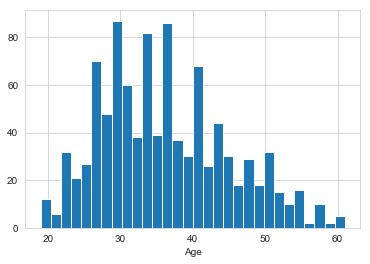

In [21]:
sns.set_style('whitegrid')
ad_data['Age'].hist(bins=30)
plt.xlabel('Age')

**Create a jointplot showing Area Income versus Age.**

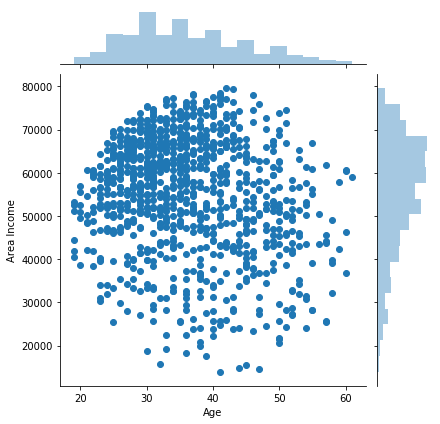

In [20]:
sns.jointplot(x='Age',y='Area Income',data=ad_data)

**Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

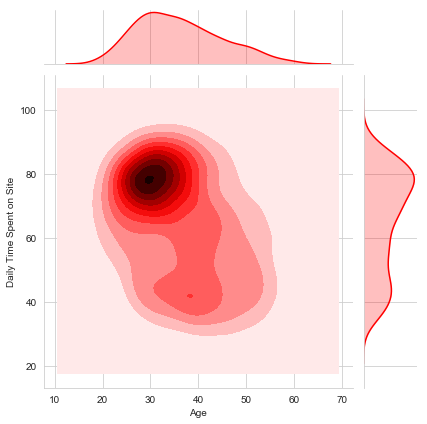

In [23]:
sns.jointplot(x='Age',y='Daily Time Spent on Site',data=ad_data,kind='kde',color='red')

** Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

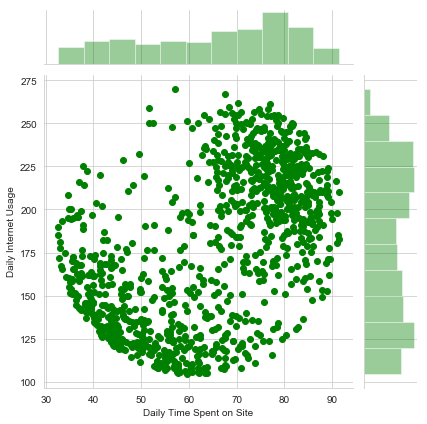

In [24]:
sns.jointplot(x='Daily Time Spent on Site',y ='Daily Internet Usage',data=ad_data,color='green')

** Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

In [ ]:
sns.pairplot(ad_data,hue='Clicked on Ad',palette='bwr')

# Logistic Regression

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

** Split the data into training set and testing set using train_test_split**

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
ad_data.head(1)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,AgeBand,AreaIncomeBand,DailyTimeBand,DailyUsageBand,NewAge,NewAreaIncome,NewDailyTime
0,68.95,35,61833.9,256.09,0,0,"(27.4, 35.8]","(53289.48, 66387.14]","(67.898, 79.664]","(236.924, 269.96]",1,3,3


In [30]:
X = ad_data[['Male','NewAge','NewAreaIncome','NewDailyTime','NewDailyUsage']]
y = ad_data['Clicked on Ad']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

** Train and fit a logistic regression model on the training set.**

In [32]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()

In [33]:
lm.fit(X_train,y_train)

c:\users\ayush sengar\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

## Predictions and Evaluations
** Now predict values for the testing data.**

In [34]:
predictions = lm.predict(X_test)

** Create a classification report for the model.**

In [35]:
from sklearn.metrics import classification_report,confusion_matrix

In [36]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
round(lm.score(X_train, y_train) * 100, 2)

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       206
           1       0.95      0.93      0.94       194

   micro avg       0.94      0.94      0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400

[[197   9]
 [ 14 180]]


96.5

Time to check the accuracy of different algorithm on our dataset

* You can read more about these algorithms here:-
   https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble
* Also note that with some algorithms I have given values to parameters which is calculated using grisearch
  For e.g. :- 
  
  svc = SVC(C=10,gamma=0.0001,kernel='rbf')
* I have also displayed the corelations of our new features

Note -  You can also check the corelations of other features and observe the changes
     

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [38]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred_logreg = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

c:\users\ayush sengar\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


96.5

In [39]:
coeff_df = pd.DataFrame(['Male','New Age','NewAreaIncome','NewDailyTime','NewDailyUsage'])
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)


,Feature,Correlation
1,New Age,1.214547
0,Male,0.075036
2,NewAreaIncome,-0.494101
3,NewDailyTime,-1.301974
4,NewDailyUsage,-1.498370


**Grid Search**

* I have found the values of 3 parameters of algorithm 'SGDClassifier()' by passing some of the values to gridsearch algo
* grid.best_params_ tells us the values which give higher accuracy

Note - Try to find out the parameters of other algorithm also

In [40]:
param_grid = {'epsilon': [0.1,1, 10, 100, 1000], 'tol': [1,0.1,0.01,0.001,0.0001], 'max_iter': [1000,10000,100000]} 
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SGDClassifier(),param_grid,refit=True,verbose=0)

In [41]:
grid.fit(X_train,y_train)

c:\users\ayush sengar\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'epsilon': [0.1, 1, 10, 100, 1000], 'tol': [1, 0.1, 0.01, 0.001, 0.0001], 'max_iter': [1000, 10000, 100000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [42]:
grid.best_params_

{'epsilon': 1, 'max_iter': 1000, 'tol': 0.1}

In [ ]:
svc = SVC(C=10,gamma=0.0001,kernel='rbf')
svc.fit(X_train, y_train)
Y_pred_SVC = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
print(acc_svc)
print(classification_report(y_test,Y_pred_SVC))
print(confusion_matrix(y_test,Y_pred_SVC))

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred_knn = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
print(acc_knn)
print(classification_report(y_test,Y_pred_knn))
print(confusion_matrix(y_test,Y_pred_knn))

In [ ]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred_guassian = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
print(acc_gaussian)
print(classification_report(y_test,Y_pred_guassian))
print(confusion_matrix(y_test,Y_pred_guassian))

In [ ]:
perceptron = Perceptron(alpha = 1, eta0 =  0.1, max_iter = 100000)
perceptron.fit(X_train, y_train)
Y_pred_perceptron = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)
print(acc_perceptron)
print(classification_report(y_test,Y_pred_perceptron))
print(confusion_matrix(y_test,Y_pred_perceptron))

In [ ]:
linear_svc = LinearSVC(C = 10, max_iter =  100000, tol = 0.001)
linear_svc.fit(X_train, y_train)
Y_pred_linear_svc = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)
print(acc_linear_svc)
print(classification_report(y_test,Y_pred_linear_svc))
print(confusion_matrix(y_test,Y_pred_linear_svc))

In [ ]:
sgd = SGDClassifier(epsilon = 1,max_iter =  10000, tol = 0.001)
sgd.fit(X_train, y_train)
Y_pred_sgd = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
print(acc_sgd)
print(classification_report(y_test,Y_pred_sgd))
print(confusion_matrix(y_test,Y_pred_sgd))

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred_dt = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
print(acc_decision_tree)
print(classification_report(y_test,Y_pred_dt))
print(confusion_matrix(y_test,Y_pred_dt))

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred_rf = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print(acc_random_forest)
print(classification_report(y_test,Y_pred_rf))
print(confusion_matrix(y_test,Y_pred_rf))

**Final Comparison of Algorithms**

Note - Different Algo gives different results on different data sets.      

In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

## GREAT JOB!!